In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('rolling_stones_spotify.csv')
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


## 	Initial data inspection and data cleaning:

In [3]:
df.isna().sum()

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


In [9]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [11]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1610 non-null   object        
 1   album             1610 non-null   object        
 2   release_date      1610 non-null   datetime64[ns]
 3   track_number      1610 non-null   int64         
 4   id                1610 non-null   object        
 5   uri               1610 non-null   object        
 6   acousticness      1610 non-null   float64       
 7   danceability      1610 non-null   float64       
 8   energy            1610 non-null   float64       
 9   instrumentalness  1610 non-null   float64       
 10  liveness          1610 non-null   float64       
 11  loudness          1610 non-null   float64       
 12  speechiness       1610 non-null   float64       
 13  tempo             1610 non-null   float64       
 14  valence           1610 n

## Exploratory Data Analysis and Feature Engineering:

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

### o	Use appropriate visualizations to find out which two albums should be recommended to anyone based on the number of popular songs in an album

In [15]:
df['album'].value_counts()

album
Voodoo Lounge Uncut (Live)                                   56
Honk (Deluxe)                                                47
Tattoo You (Super Deluxe)                                    46
Live Licks                                                   46
Some Girls (Deluxe Version)                                  44
                                                             ..
Their Satanic Majesties Request                              10
Let It Bleed (50th Anniversary Edition / Remastered 2019)     9
Black And Blue                                                8
Black And Blue (Remastered 2009)                              8
Jamming With Edward                                           6
Name: count, Length: 90, dtype: int64

In [39]:
# selecting high popularity songs in data...

ndf = df[df['popularity']>42]

A popularity threshold was applied to identify popular songs. However, exploratory analysis revealed that each album contained only one song above the threshold, resulting in uniform counts across albums. Therefore, the popularity threshold was adjusted to obtain a more meaningful comparison between albums, and albums with higher counts of popular songs were recommended.

#### The Two highest popular albums to be recommended are...

In [48]:
ndf.groupby(['album'])['popularity'].value_counts().sort_values(ascending=False)[0:2]

album                        popularity
12 X 5                       44            2
Sticky Fingers (Remastered)  43            2
Name: count, dtype: int64

In [55]:
top10 = ndf.groupby(['album'])['popularity'].value_counts().sort_values(ascending=False).reset_index(name='no. of songs')[0:9]
top10

,album,popularity,no. of songs
0,12 X 5,44,2
1,Sticky Fingers (Remastered),43,2
2,Let It Bleed,50,2
3,Exile On Main Street (2010 Re-Mastered),43,2
4,Aftermath,80,1
5,A Bigger Bang (2009 Re-Mastered),45,1
6,Aftermath,44,1
7,Aftermath,64,1
8,Beggars Banquet (50th Anniversary Edition),44,1


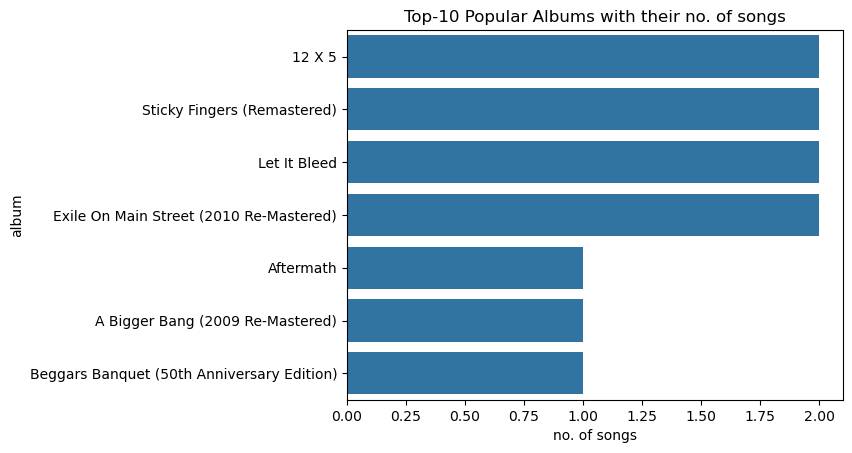

In [65]:
sns.barplot(data=top10 , y = 'album',x= 'no. of songs')
plt.title('Top-10 Popular Albums with their no. of songs')
plt.show()

#### According to plot above...
We conclude that 2 albums that should be recommended are '12x5' and 'Sticky Fingers (Remastered)'	

### Perform exploratory data analysis to dive deeper into different features of songs and identify the pattern.

In [84]:
df.head(1)

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996,0.932,-12.913,0.11,118.001,0.0302,33,48640


### Histplots of diff features for their distribution

<Axes: xlabel='popularity', ylabel='Count'>

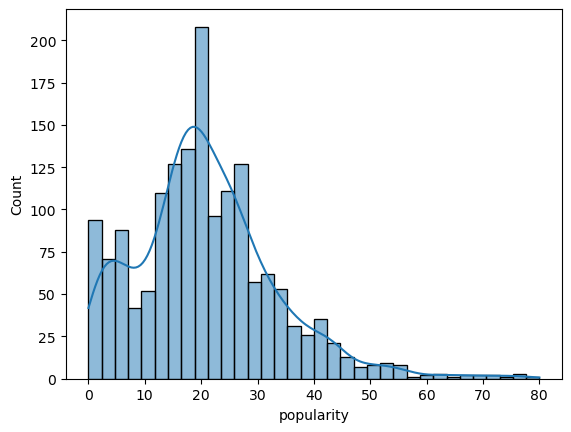

In [86]:
sns.histplot(df['popularity'],kde=True)

<Axes: xlabel='release_date', ylabel='Count'>

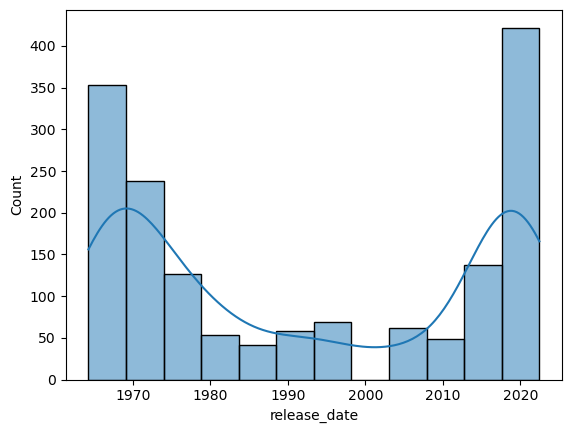

In [87]:
sns.histplot(df['release_date'],kde=True)

<Axes: xlabel='energy', ylabel='Count'>

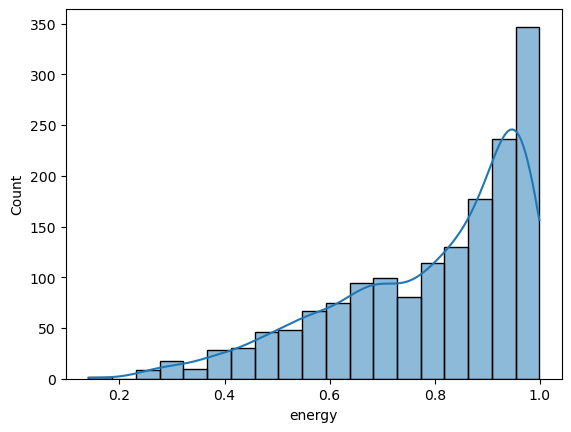

In [88]:
sns.histplot(df['energy'],kde=True)

<Axes: xlabel='loudness', ylabel='Count'>

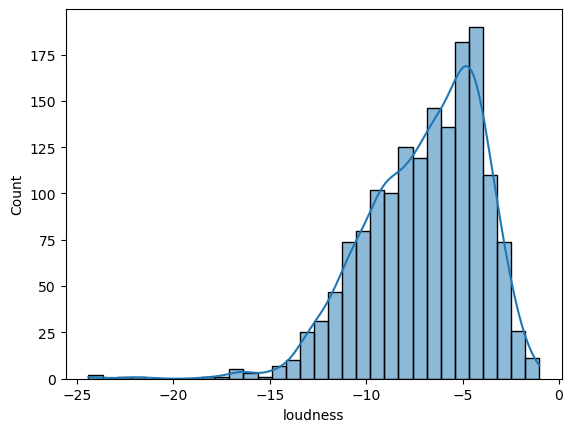

In [89]:
sns.histplot(df['loudness'],kde=True)

<Axes: xlabel='tempo', ylabel='Count'>

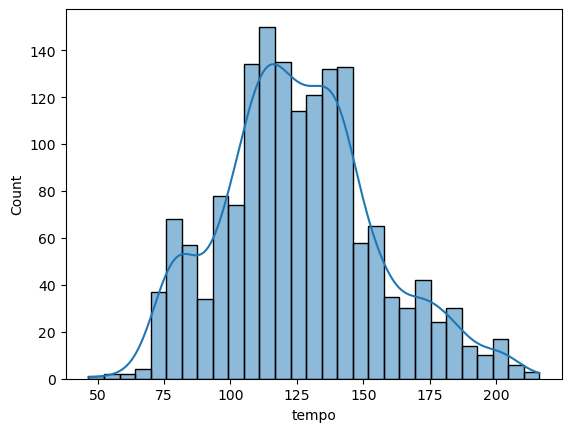

In [90]:
sns.histplot(df['tempo'],kde=True)

### Plots between numric feature to get their relation and variation

<Axes: xlabel='loudness', ylabel='energy'>

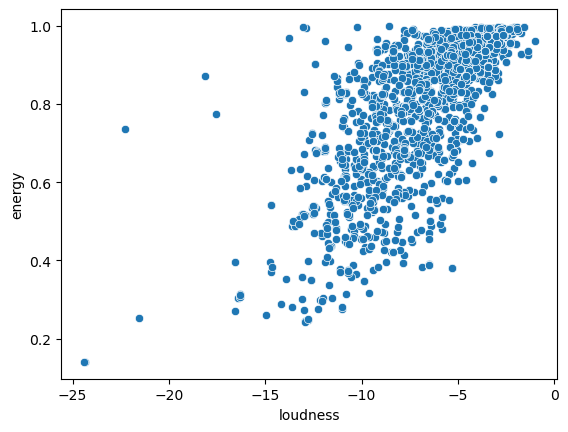

In [123]:
sns.scatterplot(data=df, x='loudness',y='energy')

<Axes: xlabel='danceability', ylabel='energy'>

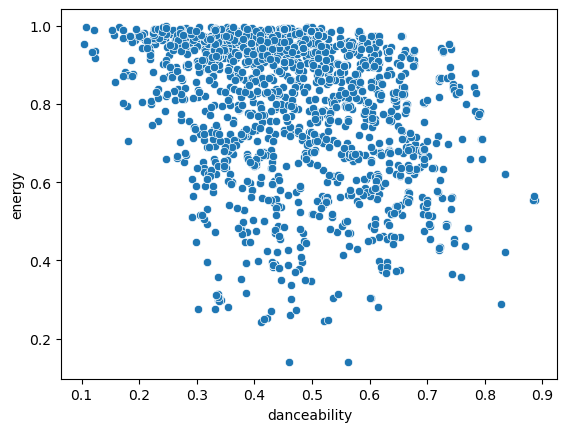

In [124]:
sns.scatterplot(data=df, x='danceability',y='energy')

<Axes: xlabel='liveness', ylabel='energy'>

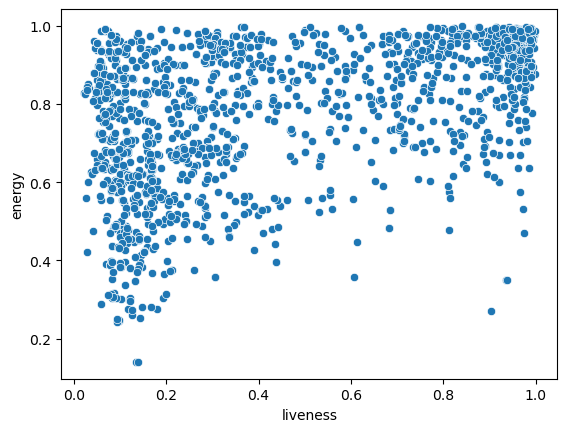

In [125]:
sns.scatterplot(data=df, x='liveness',y='energy')

<Axes: xlabel='loudness', ylabel='tempo'>

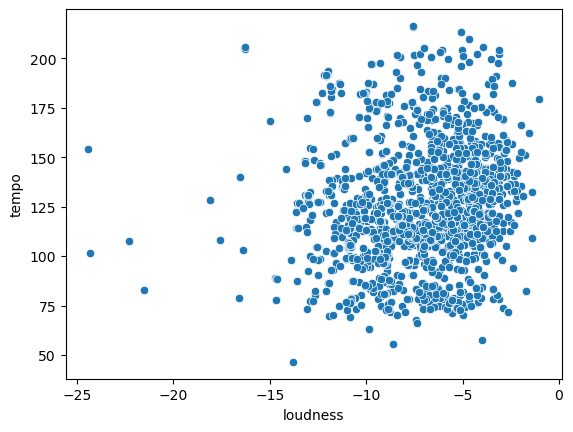

In [126]:
sns.scatterplot(data=df, x='loudness',y='tempo')

<Axes: xlabel='loudness', ylabel='valence'>

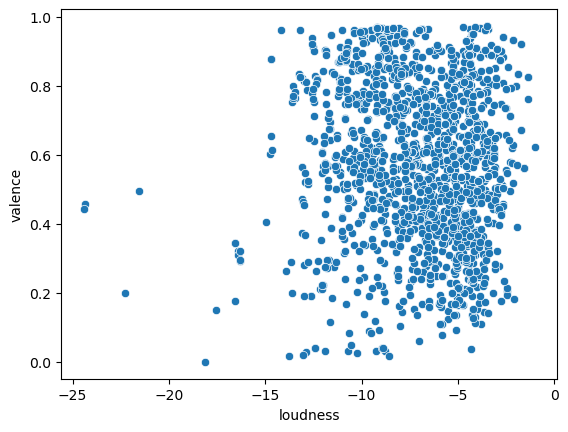

In [127]:
sns.scatterplot(data=df, x='loudness',y='valence')

In [91]:
df.head(1)

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996,0.932,-12.913,0.11,118.001,0.0302,33,48640


### Boxplots of features to get outliers

<Axes: xlabel='popularity'>

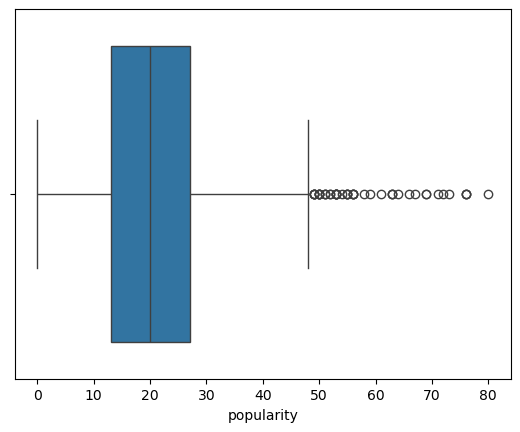

In [93]:
sns.boxplot(data=df, x='popularity')

<Axes: xlabel='energy'>

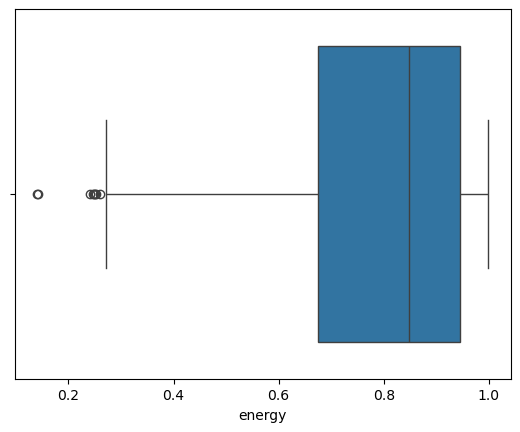

In [103]:
sns.boxplot(data=df, x='energy')

<Axes: xlabel='loudness'>

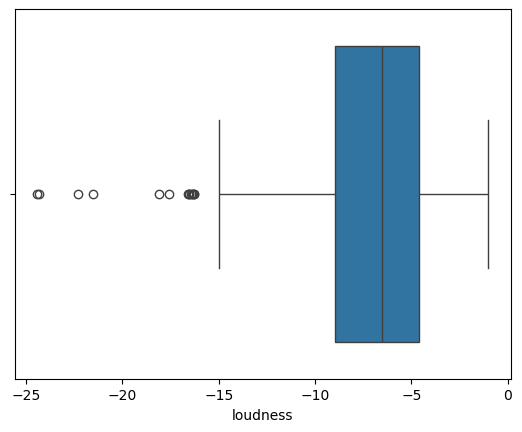

In [104]:
sns.boxplot(data=df, x='loudness')

## 	Discover how a song's popularity relates to various factors and how this has changed over time.

### Scatterplot between numeric features to see variance of each with 'popularity'

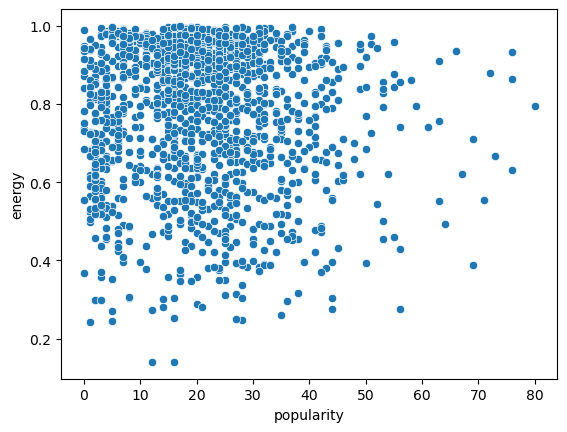

In [122]:
sns.scatterplot(data=df, x='popularity',y='energy')
plt.show()

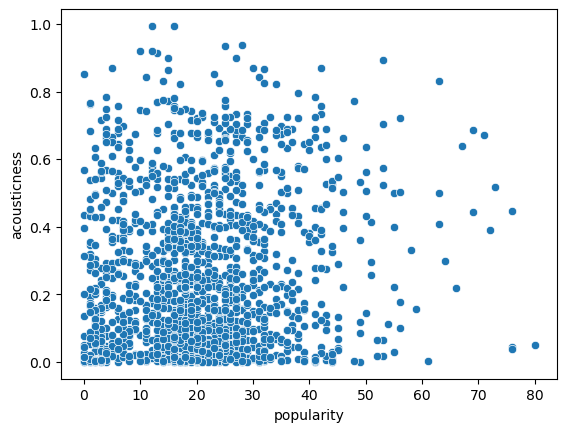

In [99]:
sns.scatterplot(data=df, x='popularity',y='acousticness')
plt.show()

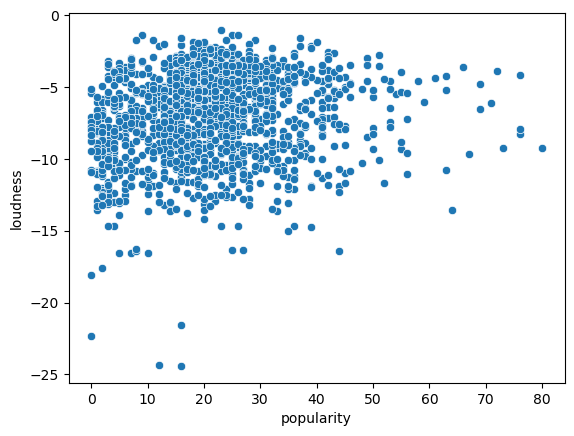

In [100]:
sns.scatterplot(data=df, x='popularity',y='loudness')
plt.show()

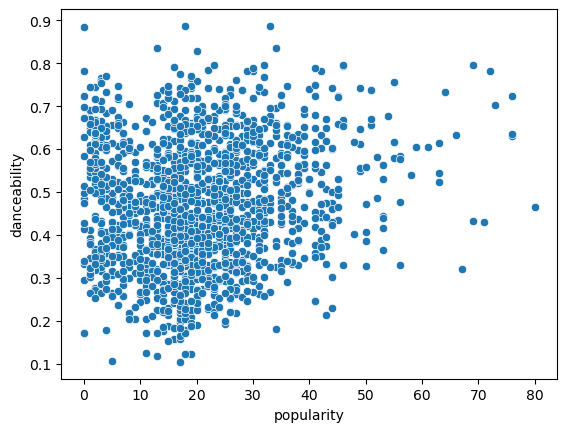

In [98]:
sns.scatterplot(data=df, x='popularity',y='danceability')
plt.show()

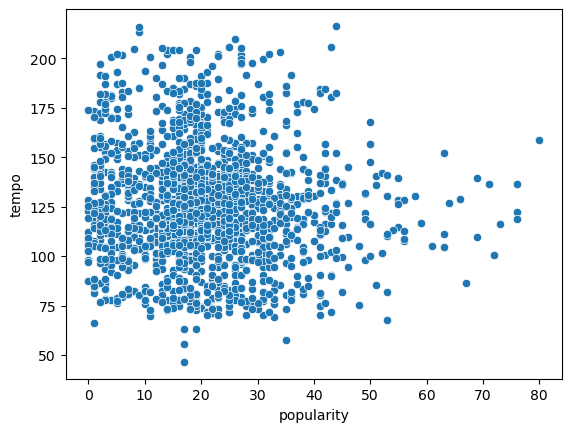

In [102]:
sns.scatterplot(data=df, x='popularity',y='tempo')
plt.show()

### Heatmap of Numeric Features 

In [67]:
corr = df.corr(numeric_only=True)
corr

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
track_number,1.000000,-0.035675,-0.112004,0.096314,-0.002772,0.188351,0.100835,0.040617,-0.023934,-0.104567,-0.145115,0.156455
acousticness,-0.035675,1.000000,0.070017,-0.363819,0.061403,-0.117739,-0.237083,-0.021774,-0.171003,-0.138803,0.108046,0.039128
danceability,-0.112004,0.070017,1.000000,-0.300536,-0.031812,-0.516387,-0.249406,-0.322684,-0.324398,0.546210,0.141205,-0.220045
energy,0.096314,-0.363819,-0.300536,1.000000,0.120261,0.511188,0.698039,0.417214,0.201885,0.046217,-0.057272,0.148876
instrumentalness,-0.002772,0.061403,-0.031812,0.120261,1.000000,0.008873,0.012524,0.009586,0.010961,0.103480,-0.010612,-0.137599
liveness,0.188351,-0.117739,-0.516387,0.511188,0.008873,1.000000,0.327036,0.400018,0.108855,-0.347451,-0.205845,0.304735
loudness,0.100835,-0.237083,-0.249406,0.698039,0.012524,0.327036,1.000000,0.189904,0.112837,-0.027571,0.156323,0.221558
speechiness,0.040617,-0.021774,-0.322684,0.417214,0.009586,0.400018,0.189904,1.000000,0.192687,-0.399751,-0.136745,0.114546
tempo,-0.023934,-0.171003,-0.324398,0.201885,0.010961,0.108855,0.112837,0.192687,1.000000,0.000558,-0.061061,0.001465
valence,-0.104567,-0.138803,0.546210,0.046217,0.103480,-0.347451,-0.027571,-0.399751,0.000558,1.000000,0.065333,-0.244833


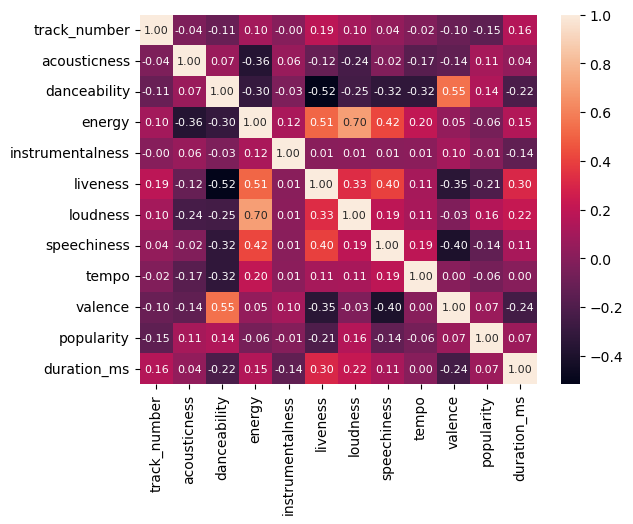

<Figure size 100x100 with 0 Axes>

In [82]:
sns.heatmap(data=corr, annot=True , fmt='.2f', annot_kws={'size' : 8})
plt.figure(figsize=(1,1))
plt.show()

In [108]:
df.head(1)

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996,0.932,-12.913,0.11,118.001,0.0302,33,48640


In [112]:
df['year'] = df['release_date'].dt.year
df.head()

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,year
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640,2022
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173,2022
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160,2022
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880,2022
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106,2022


In [115]:
pop_time = df.groupby(['year'])['popularity'].mean().reset_index(name='popularity_mean')
pop_time.head()

,year,popularity_mean
0,1964,18.250000
1,1965,17.611111
2,1966,17.428571
3,1967,17.382353
4,1968,28.500000


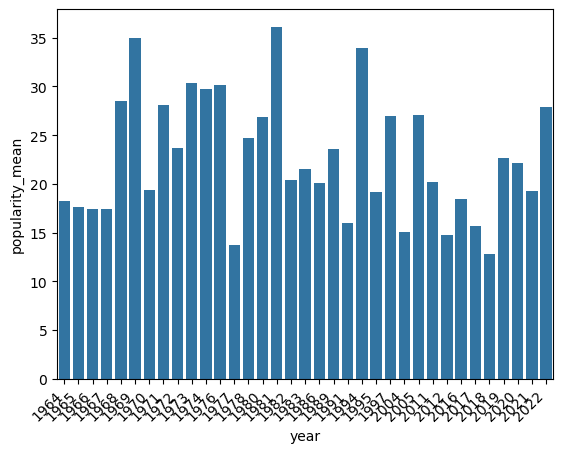

In [120]:
sns.barplot(data=pop_time, x='year' , y='popularity_mean')
plt.xticks(rotation=45,ha='right')
plt.show()

###	 Comment on the importance of dimensionality reduction techniques, share your ideas and explain your observations.


In this dataset, several audio features such as energy and loudness exhibit strong correlations, indicating overlapping information. Techniques like Principal Component Analysis (PCA) can combine these correlated features into a smaller set of components, improving computational efficiency and model performance

## 	Perform Cluster Analysis:
### Identify the right number of clusters
o	Use appropriate clustering algorithm


o	Define each cluster based on the features



In [128]:
from sklearn.cluster import KMeans

In [129]:
df.head()

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,year
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640,2022
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173,2022
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160,2022
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880,2022
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106,2022


In [144]:
num_vars = df.select_dtypes(include='number').columns
cdf = df[num_vars]
cdf.head()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,year
0,1,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640,2022
1,2,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173,2022
2,3,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160,2022
3,4,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880,2022
4,5,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106,2022


In [147]:
cdf.columns

Index(['track_number', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'duration_ms', 'year'],
      dtype='object')

In [148]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()

cdf_std = stdsc.fit_transform(cdf)
cdf_std = pd.DataFrame(data= cdf_std, columns=cdf.columns)

In [150]:
cdf_std.head()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,year
0,-1.160941,-0.739355,-0.041343,1.115764,3.012099,1.261552,-1.985045,0.784410,-0.276517,-2.387590,0.982999,-1.930719,1.34862
1,-1.008460,0.820518,-1.007963,0.960062,0.249238,1.344648,0.724545,0.123753,0.183852,-1.142678,1.063495,-0.042138,1.34862
2,-0.855979,0.728140,-0.584626,0.982305,0.853953,1.330321,0.680109,0.881280,0.136323,-1.164306,1.063495,0.050079,1.34862
3,-0.703497,1.392383,-0.704571,1.071278,-0.594080,1.155532,0.479980,2.392459,0.236514,-1.882359,0.902504,0.444539,1.34862
4,-0.551016,0.657756,-1.170242,0.982305,-0.392050,1.358975,0.625984,0.455050,0.152303,-1.627147,0.902504,0.437392,1.34862


In [151]:
from sklearn.metrics import silhouette_score

In [153]:
for k in range (2,9):
    km = KMeans(n_clusters=k)
    km.fit(cdf)

    labels = km.labels_
    
    score = silhouette_score(cdf, labels)
    print(f'For value of K : {k}\n We get Silhoutte Score : {score}')

For value of K : 2
 We get Silhoutte Score : 0.6333473614243762
For value of K : 3
 We get Silhoutte Score : 0.5472506143149362
For value of K : 4
 We get Silhoutte Score : 0.5406621208969635
For value of K : 5
 We get Silhoutte Score : 0.5171597374309812
For value of K : 6
 We get Silhoutte Score : 0.5303864802711299
For value of K : 7
 We get Silhoutte Score : 0.539532125854031
For value of K : 8
 We get Silhoutte Score : 0.5227584998503998


### We get best value for K is 2

## Define each cluster based on the features

In [154]:
km = KMeans(n_clusters=2, random_state=42)

In [155]:
clusters = km.fit_predict(cdf)

In [157]:
cdf['cluster'] = clusters

C:\Users\vatsc\AppData\Local\Temp\ipykernel_5672\3298518098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['cluster'] = clusters


In [159]:
cdf.cluster.value_counts()

cluster
0    1389
1     221
Name: count, dtype: int64

In [161]:
cluster_summary = cdf.groupby('cluster').mean()
print(cluster_summary)

         track_number  acousticness  danceability    energy  instrumentalness  \
cluster                                                                         
0            8.217423      0.243812      0.480065  0.788234          0.171197   
1           11.104072      0.292354      0.398434  0.818235          0.120004   

         liveness  loudness  speechiness       tempo   valence  popularity  \
cluster                                                                      
0        0.459777 -7.055478     0.067377  125.977366  0.602830   20.774658   
1        0.692557 -6.444529     0.082936  126.739869  0.452288   20.873303   

           duration_ms         year  
cluster                              
0        225870.418287  1989.924406  
1        458016.900452  2003.194570  


### Conclusion from Cluster Summury

Cluster 0 seems to represent older, moderately energetic, shorter tracks with positive vibes, mostly sung songs, moderately danceable, not very popular.

Cluster 1 represents newer, longer tracks, lower energy, less positive/happier, often live recordings, not very danceable, mostly vocal songs.